# Video game sales


Mount the drive folders to enable us to work with the data directly from the google drive shared folder.

Navigate to the shared folder and use pandas to import all the needed data. The data is in a CSV format (Comma Separated Values).

In [1]:
#IMPORTS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#comment if not being run in colab

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/INTRO\ DATA\ MINING/
%ls

data_csv = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

/content/drive/MyDrive/INTRO DATA MINING
 Others/                  Video_Games_Sales_as_at_22_Dec_2016.csv
'Project 1 Report.gdoc'   VideoGames_sales.ipynb


In [4]:
#check missing values
data_csv.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#Preprocessing


First of all we will use the method "describe()" to get the name of all the columns, together with some samples of each dataset.


In [5]:
print(data_csv.describe())
data_csv.head()

       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  16719.000000  16719.000000   8137.000000   8137.000000  7590.000000   
mean       0.047332      0.533543     68.967679     26.360821     7.125046   
std        0.186710      1.547935     13.938165     18.980495     1.500006   
min        0.000000      0.010000     13.000000      3.000000     0.000000 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


We will drop the Name, Critic count and User count columns since we believe they do not add any relevant information in our dataset. Finally, we delete all the rows that contain a NULL value since it is uncomplete data.

In [6]:
data_csv = data_csv.drop(columns=['Name'])
data_csv = data_csv.drop(columns=['Critic_Count'])
data_csv = data_csv.drop(columns=['User_Count'])
data_csv = data_csv.drop(columns=['Global_Sales'])
data_csv['User_Score'] = data_csv['User_Score'].astype(float) #make the user score float64
data_csv['EU_Sales'] = data_csv['EU_Sales'].mul(1000)
data_csv['Other_Sales'] = data_csv['Other_Sales'].mul(1000)
data_csv['JP_Sales'] = data_csv['JP_Sales'].mul(1000)
data_csv['NA_Sales'] = data_csv['NA_Sales'].mul(1000)
data_csv['User_Score'] = data_csv['User_Score'].mul(10)
data_csv = data_csv.dropna()
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         6825 non-null   object 
 1   Year_of_Release  6825 non-null   float64
 2   Genre            6825 non-null   object 
 3   Publisher        6825 non-null   object 
 4   NA_Sales         6825 non-null   float64
 5   EU_Sales         6825 non-null   float64
 6   JP_Sales         6825 non-null   float64
 7   Other_Sales      6825 non-null   float64
 8   Critic_Score     6825 non-null   float64
 9   User_Score       6825 non-null   float64
 10  Developer        6825 non-null   object 
 11  Rating           6825 non-null   object 
dtypes: float64(7), object(5)
memory usage: 693.2+ KB


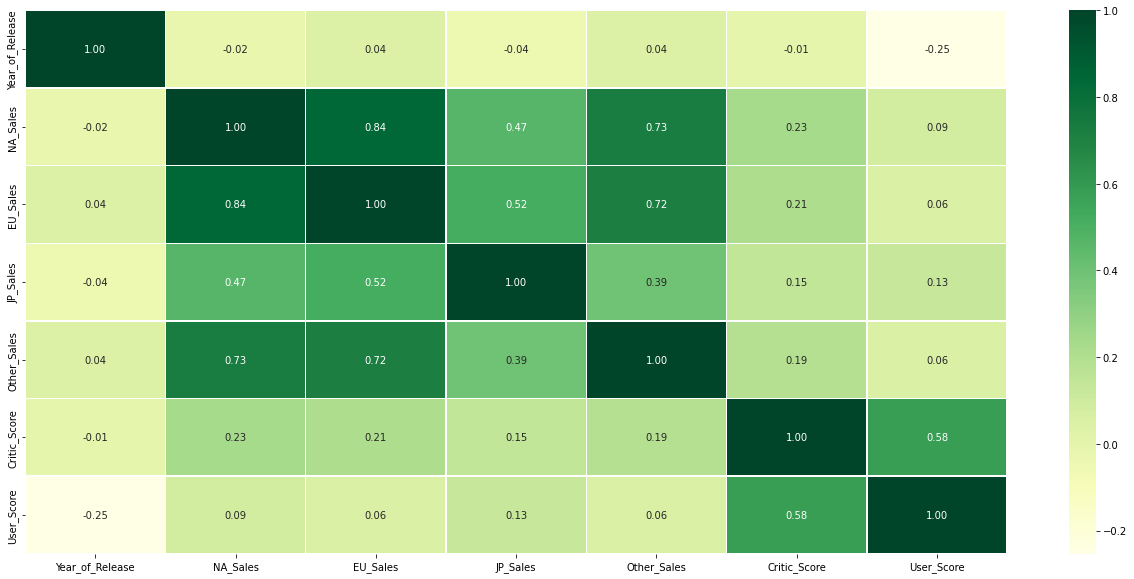

In [7]:

corr_matrix = data_csv.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()

We will start the encoding of the variables that need it, which are the following:

1. Platform → Label Encoder
2. Genre → Label Encoder
3. Publisher → Label Encoder
4. Developer → Label Encoder
5. Rating → Label Encoder

In [8]:
label_encoder = preprocessing.LabelEncoder()
Ordinal_encoder = preprocessing.OrdinalEncoder()


data_csv['Platform'] = label_encoder.fit_transform(data_csv['Platform']) #encoding 'Platform' attribute
data_csv['Genre'] = label_encoder.fit_transform(data_csv['Genre']) #encoding 'Genre' attribute
data_csv['Publisher'] = label_encoder.fit_transform(data_csv['Publisher']) #encoding 'Publisher' attribute
data_csv['Developer'] = label_encoder.fit_transform(data_csv['Developer']) #encoding 'Developer' attribute
data_csv['Rating'] = label_encoder.fit_transform(data_csv['Rating']) #encoding 'Rating' attribute


print('################################################################ DATA AFTER ENCODING ################################################################')
data_csv.head()

################################################################ DATA AFTER ENCODING ################################################################


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Developer,Rating
0,12,2006.0,10,160,41360.0,28960.0,3770.0,8450.0,76.0,80.0,771,1
2,12,2008.0,6,160,15680.0,12760.0,3790.0,3290.0,82.0,83.0,771,1
3,12,2009.0,10,160,15610.0,10930.0,3280.0,2950.0,80.0,80.0,771,1
6,2,2006.0,4,160,11280.0,9140.0,6500.0,2880.0,89.0,85.0,771,1
7,12,2006.0,3,160,13960.0,9180.0,2930.0,2840.0,58.0,66.0,771,1


In [9]:
print('################################################################ TRAIN DATA DESCRIPTION ################################################################')
#data_csv.style.format(precision=10)
print(data_csv.describe())
print(data_csv.mode())

################################################################ TRAIN DATA DESCRITPION ################################################################
          Platform  Year_of_Release        Genre    Publisher      NA_Sales  \
count  6825.000000      6825.000000  6825.000000  6825.000000   6825.000000   
mean      8.588571      2007.436777     5.095971   131.284396    394.483516   
std       4.289097         4.211248     3.811582    81.638341    967.385316   
min       0.000000      1985.000000     0.000000     0.000000      0.000000   
25%       5.000000      2004.000000     1.000000    61.000000     60.000000   
50%       8.000000      2007.000000     6.000000   144.000000    150.000000   
75%      12.000000      2011.000000     8.000000   207.000000    390.000000   
max      16.000000      2016.000000    11.000000   261.000000  41360.000000   

           EU_Sales     JP_Sales   Other_Sales  Critic_Score   User_Score  \
count   6825.000000  6825.000000   6825.000000   6825.0000

Checking distribution of numeric attributes

0 JP_Sales
1 EU_Sales
2 NA_Sales


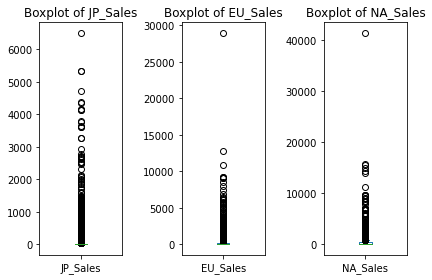

In [10]:
attributes = ['JP_Sales','EU_Sales','NA_Sales']

for i, attribute in enumerate(attributes):

    print(i, attribute)
    
    # Set up the plot
    ax = plt.subplot(1, 3, i + 1)
    
    # Draw the plot
    data_csv[attribute].plot(kind='box')
    
    # Title and labels
    ax.set_title('Boxplot of %s' % attribute)

plt.tight_layout()
plt.show()

We can see some outliers that should be removed before proceeding with the data processing.

In [11]:
q_low = data_csv["JP_Sales"].quantile(0.05)
q_hi  = data_csv["JP_Sales"].quantile(0.95)

print(q_low, q_hi)

data_csv = data_csv[(data_csv["JP_Sales"] < q_hi) & (data_csv["JP_Sales"] > q_low)]
data_csv.info()


0.0 300.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 14 to 16573
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         1665 non-null   int64  
 1   Year_of_Release  1665 non-null   float64
 2   Genre            1665 non-null   int64  
 3   Publisher        1665 non-null   int64  
 4   NA_Sales         1665 non-null   float64
 5   EU_Sales         1665 non-null   float64
 6   JP_Sales         1665 non-null   float64
 7   Other_Sales      1665 non-null   float64
 8   Critic_Score     1665 non-null   float64
 9   User_Score       1665 non-null   float64
 10  Developer        1665 non-null   int64  
 11  Rating           1665 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 169.1 KB


0 JP_Sales
1 EU_Sales
2 NA_Sales


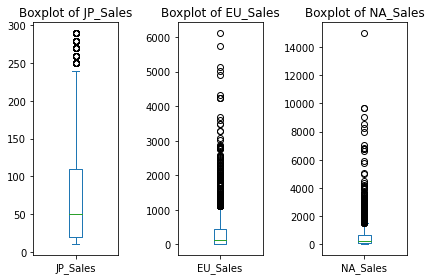

In [12]:
attributes = ['JP_Sales','EU_Sales','NA_Sales']

for i, attribute in enumerate(attributes):

    print(i, attribute)
    
    # Set up the plot
    ax = plt.subplot(1, 3, i + 1)
    
    # Draw the plot
    data_csv[attribute].plot(kind='box')
    
    # Title and labels
    ax.set_title('Boxplot of %s' % attribute)

plt.tight_layout()
plt.show()

0 JP_Sales
1 User_Score


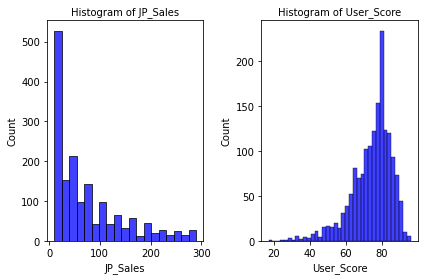

In [13]:
for i, attribute in enumerate(['JP_Sales', 'User_Score']):

    print(i, attribute)
    
    # Set up the plot
    ax = plt.subplot(1, 2, i + 1)
    
    # Draw the plot
    plt.rcParams["figure.figsize"] = (32,24)
    sns.histplot(data_csv[attribute],color = 'blue')
    
    # Title and labels
    ax.set_title('Histogram of %s' % attribute, size = 10)

plt.tight_layout()
plt.show()

**PCA Analysis**

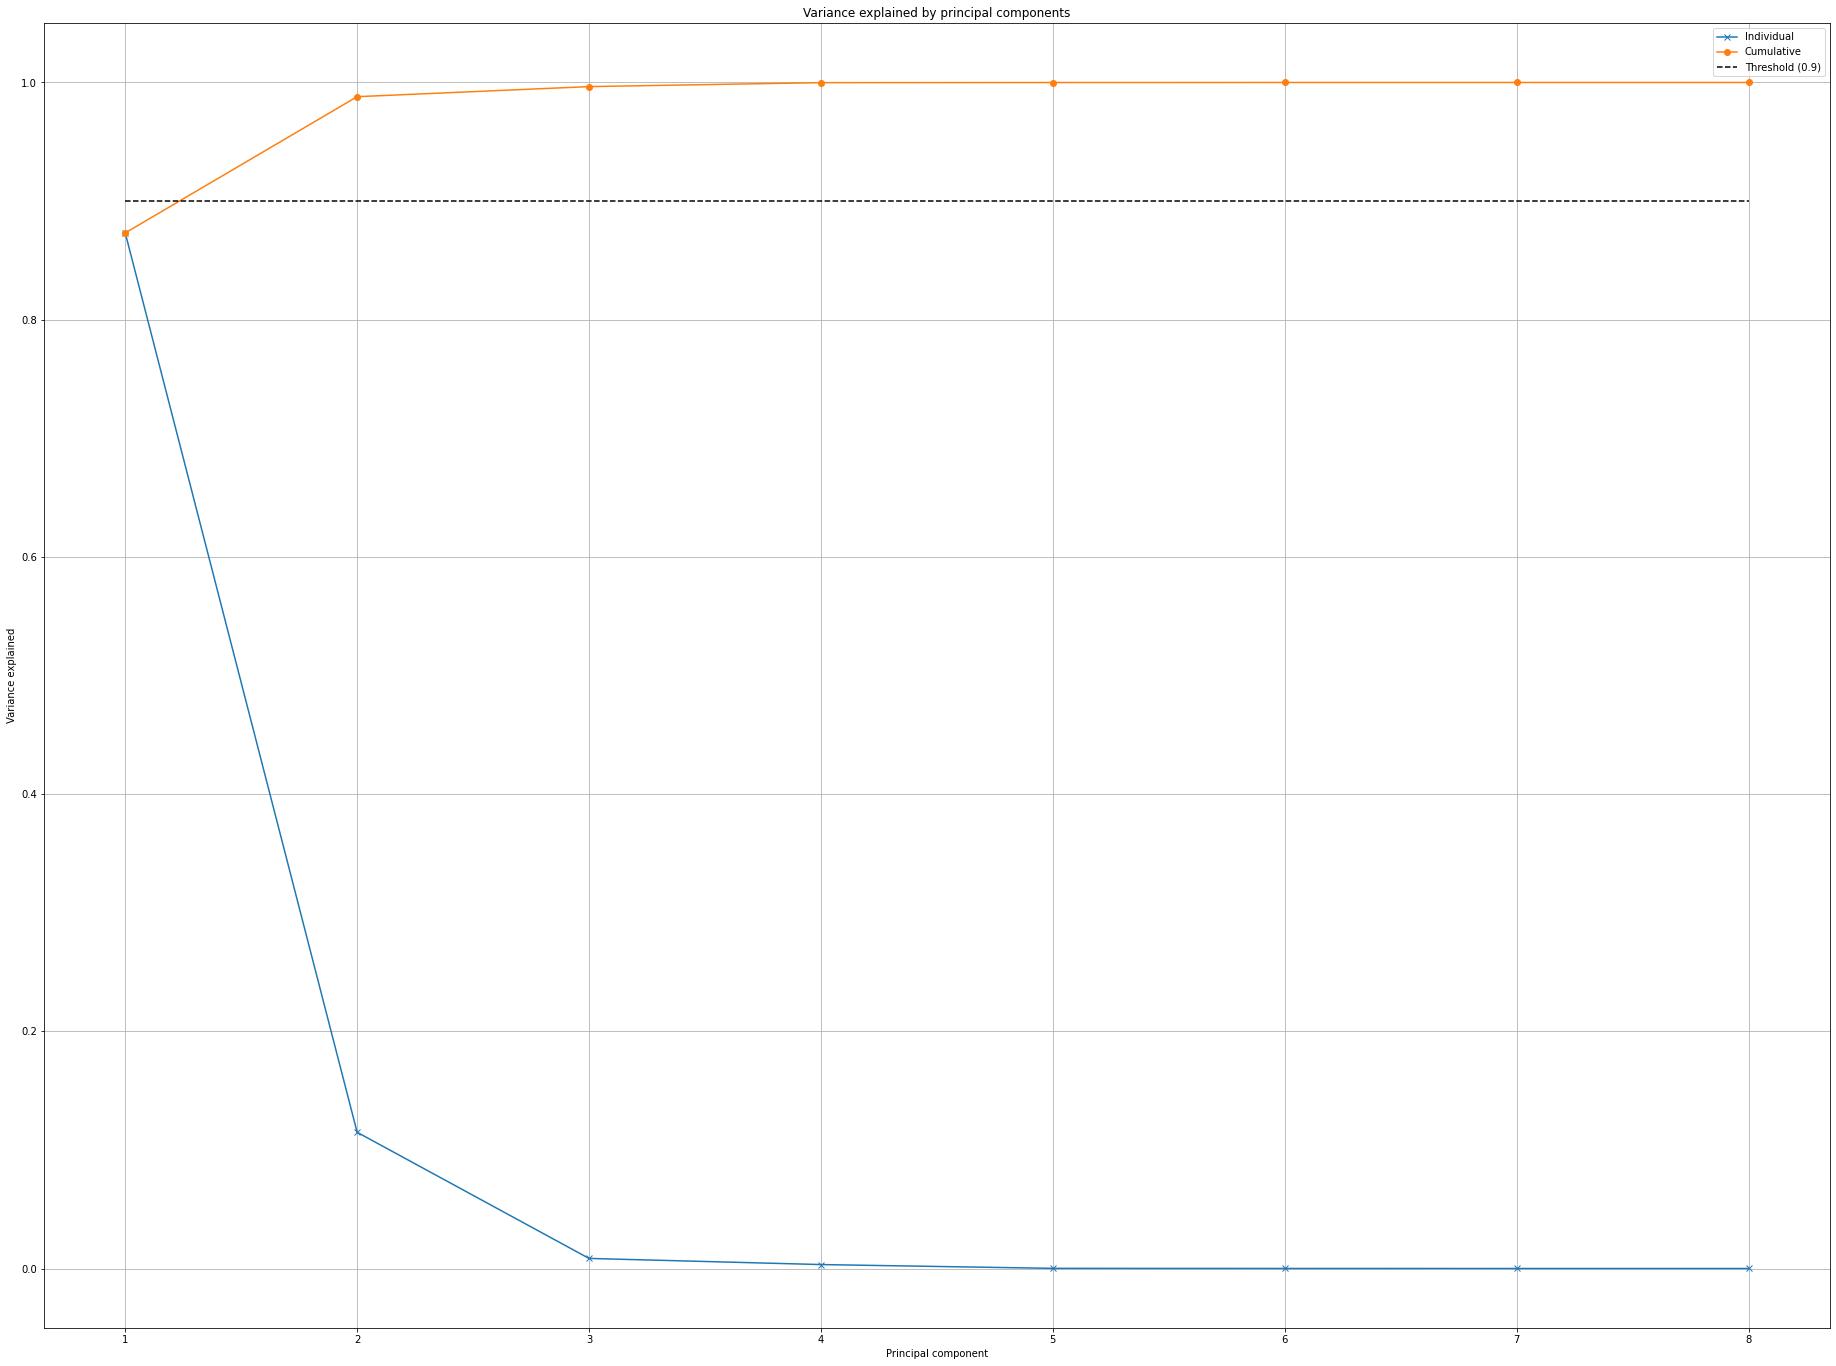

In [14]:
data_csv = data_csv.drop(columns=['Platform'])
data_csv = data_csv.drop(columns=['Genre'])
data_csv = data_csv.drop(columns=['Publisher'])
data_csv = data_csv.drop(columns=['Developer'])

X = data_csv.to_numpy()
attributeNames = data_csv.columns
N,M = X.shape

# Subtract mean value from data (already done)
#Y = data_csv.to_numpy()

Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold (0.9)'])
plt.grid()
plt.show()

       Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
14              2010.0   15000.0    4890.0     240.0       1690.0   
23              2013.0    9660.0    5140.0      60.0       1410.0   
29              2011.0    9040.0    4240.0     130.0       1320.0   
32              2010.0    9700.0    3680.0     110.0       1130.0   
35              2012.0    8250.0    4240.0      70.0       1120.0   
...                ...       ...       ...       ...          ...   
16377           2012.0       0.0       0.0      10.0          0.0   
16424           2015.0       0.0       0.0      10.0          0.0   
16514           2015.0       0.0       0.0      10.0          0.0   
16533           2007.0       0.0       0.0      10.0          0.0   
16573           2010.0       0.0       0.0      10.0          0.0   

       Critic_Score  User_Score  Rating  
14             61.0        63.0       1  
23             97.0        81.0       4  
29             88.0        34.0       4  
32 

Text(0, 0.5, 'PC2')

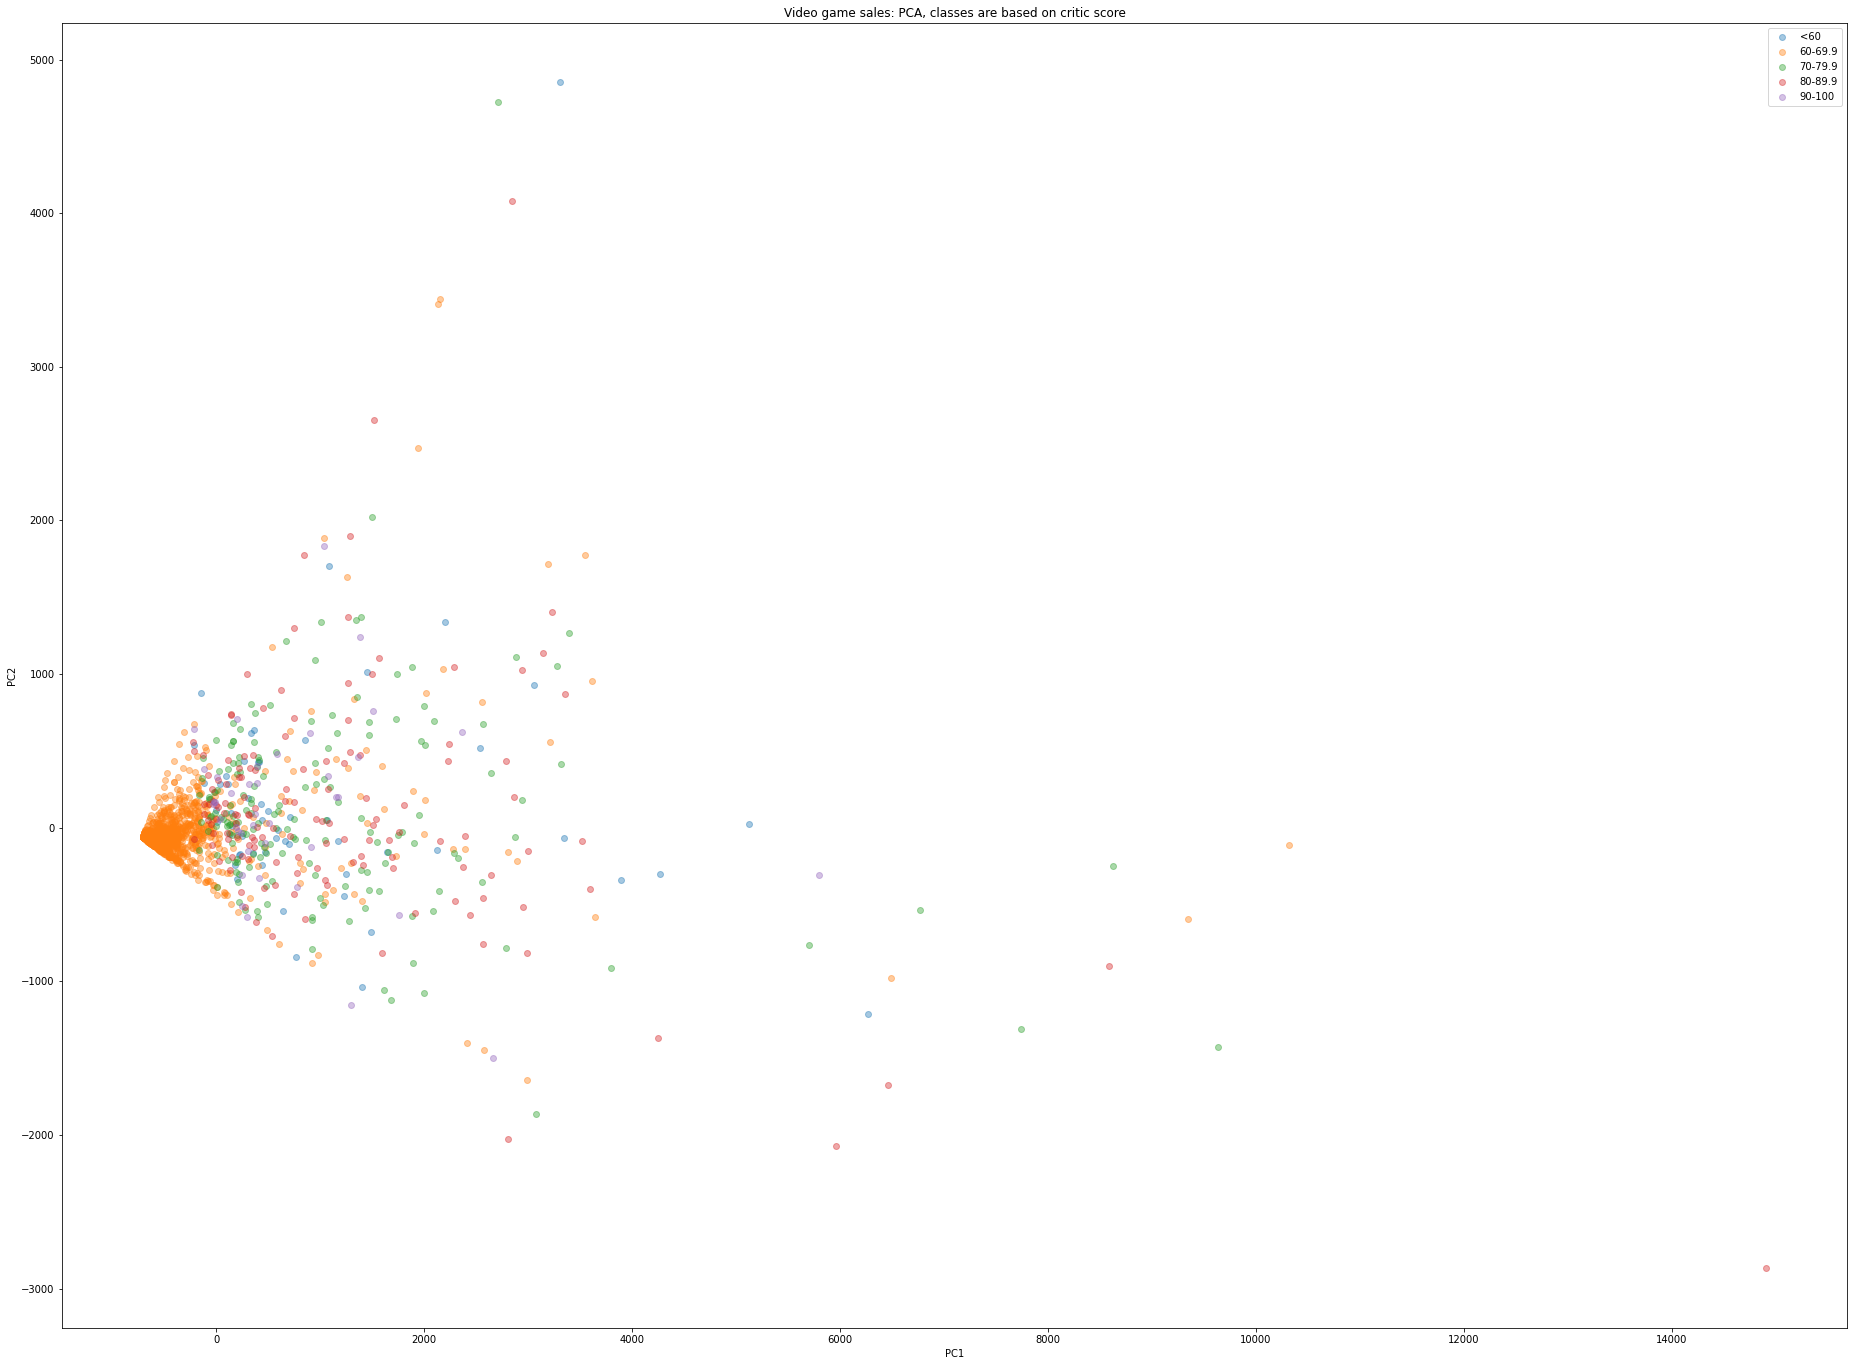

In [15]:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
y = np.ones((N,))
print(data_csv)
criticScoresFull = data_csv.iloc[:,5]
print(criticScoresFull)
criticScores = criticScoresFull.sample(500)

counter = 0;
for score in criticScores:
  if score < 60:
    y[counter] = 0
  elif score < 70:
    y[counter] = 1
  elif score < 80:
    y[counter] = 2
  elif score < 90:
    y[counter] = 3
  else:
    y[counter] = 4
  counter += 1

f = figure()
title('Video game sales: PCA, classes are based on critic score')

for c in range(5):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.4)
legend(["<60", "60-69.9", "70-79.9", "80-89.9", "90-100"]) 
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

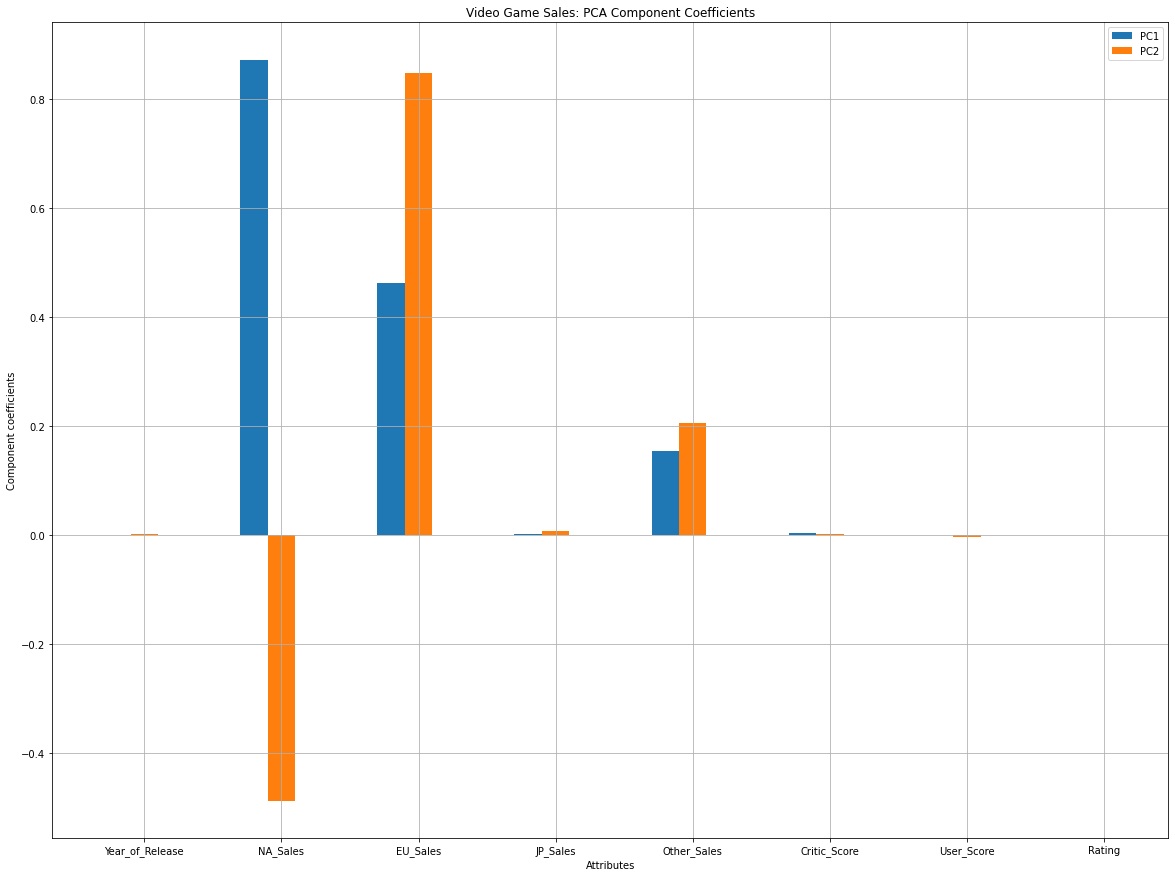

In [16]:
pcs = [0,1]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
plt.rcParams["figure.figsize"] = (20,15)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('Video Game Sales: PCA Component Coefficients')

plt.show()